In [2]:
#%%%% brain and behavior videos alignment based on blank frames

import sys
sys.path.append('../')
from os.path import dirname, realpath
# filepath = realpath(__file__)
# dir_of_file = dirname(filepath)
# parent_dir_of_file = dirname(dir_of_file)
# sys.path.append(parent_dir_of_file)
import tifffile as tif
import pandas as pd
from scipy import signal
from pathlib import Path
from tqdm import tqdm
from get_list_data import expt1_data_list, expt2_data_list
from helper import *
import gc
import numpy as np
from scipy.io import savemat
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt

In [2]:

data_root = '/media/user/teamshare/nick/behavior/grooming/2p/'
# data_root = '/mnt/njm/nick/behavior/grooming/1p/'
data_list = expt2_data_list

In [3]:
data_root

'/media/user/teamshare/nick/behavior/grooming/2p/'

In [4]:
k = int(1000)

for expt in data_list:
    mouse_id, list_rec_dir = expt
    for rec_dir in tqdm(list_rec_dir):
        # files = Path(data_root + os.sep + mouse_label + os.sep + d).glob('*.h264')
        beh_vid_file = data_root + os.sep + mouse_id + os.sep + rec_dir + os.sep + mouse_id + '_' + rec_dir + '.mp4'
        beh_log_file = data_root + os.sep + mouse_id + os.sep + rec_dir + os.sep + mouse_id + '_' + rec_dir + '.txt'
        if '1p' in data_root:
            brain_cam0_file = data_root + os.sep + mouse_id + os.sep + rec_dir + os.sep + 'cam0.tif'
            brain_frame_file = str(brain_cam0_file).replace('.tif', '_singleFrame.tif')
            brain_svd_file = str(brain_cam0_file).replace('.tif', '_svd.mat')
            brain_cam0_trim_file = str(brain_cam0_file).replace('.tif', '_trim.tif')

        beh_vid_trim_file = str(beh_vid_file).replace('.mp4', '_trim.mp4')
        beh_log_trim_file = str(beh_log_file).replace('.txt', '_trim.txt')
        
        
        
        beh_svd_file = str(beh_vid_file).replace('.mp4', '_svd.mat')
        beh_motion_file = str(beh_vid_file).replace('.mp4', '_ME.avi')
        beh_motion_svd_file = str(beh_vid_file).replace('.mp4', '_MEsvd.mat')

        if '1p' in data_root and os.path.isfile(brain_svd_file):
            print(mouse_id + "_" + rec_dir + " already processed. Skipping...")
            continue
        
        # if os.path.isfile(beh_vid_trim_file) and \
        #     (not os.path.isfile(brain_cam0_file) or os.path.isfile(brain_svd_file)) and \
        #         (os.path.isfile(beh_svd_file)) and \
        #             os.path.isfile(beh_motion_svd_file):
        #     # print('Session already aligned, Skip ',beh_vid_file)
        #     continue

        if True: # not os.path.isfile(beh_vid_trim_file):
            
            print('Processing ', beh_vid_file)
            beh_stack =  open_cv_read_video(beh_vid_file)
            beh_log = pd.read_csv(beh_log_file, sep='\t', parse_dates=['time'])

            beh_start, beh_stop = get_dark_frames(beh_stack)
            hesfsh
            beh_log_trim = beh_log.iloc[beh_start:beh_stop]
            beh_log_trim.frame = beh_log_trim.frame - beh_start
            beh_log_trim.to_csv(beh_log_trim_file, index=False, sep='\t')
            beh_stack_trim = beh_stack[beh_start:beh_stop]
            open_cv_write_video(beh_vid_file, beh_vid_trim_file, beh_start, beh_stop)
        
            # memory management
            del beh_log
            del beh_log_trim
            del beh_stack
        else:
            print("Reading trim behavior video")
            beh_stack_trim = open_cv_read_video(beh_vid_trim_file)
        
        num_beh_frames = beh_stack_trim.shape[0]

0it [00:00, ?it/s]
  0%|                                                     | 0/1 [00:00<?, ?it/s]

Processing  /media/user/teamshare/nick/behavior/grooming/2p//ETR3_thy1/20231109092652/ETR3_thy1_20231109092652.mp4



  0%|                                                     | 0/1 [01:02<?, ?it/s]


NameError: name 'hesfsh' is not defined

In [3]:
beh_vid_file = '/media/user/teamshare/nick/behavior/grooming/2p/ETR2_thy1/20231111165721/ETR2_thy1_20231111165721.mp4'
beh_stack =  open_cv_read_video(beh_vid_file)
beh_start, beh_stop = get_dark_frames(beh_stack)
beh_stack.shape

100%|█████████████████████████████████| 110002/110002 [00:29<00:00, 3720.82it/s]


(110002, 320, 640, 3)

In [4]:
beh_start

0

In [5]:
beh_stop

109902

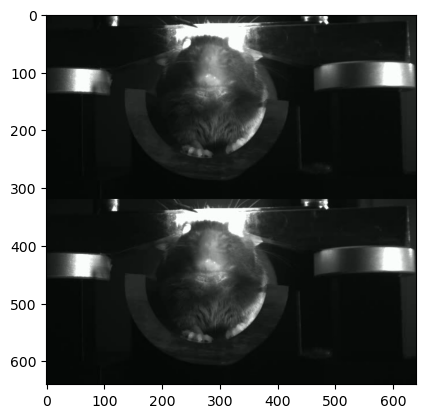

(<Figure size 640x480 with 1 Axes>,
 None)

In [23]:
plt.figure(), plt.imshow(np.vstack((beh_stack[50,:,:,:],beh_stack[62,:,:,:]))), plt.show()
# plt.figure(), plt.imshow(beh_stack[109798,:,:,:]), plt.show()

In [7]:
mean_zs = stats.zscore(beh_stack.mean(axis=tuple(range(1, beh_stack.ndim)))) 

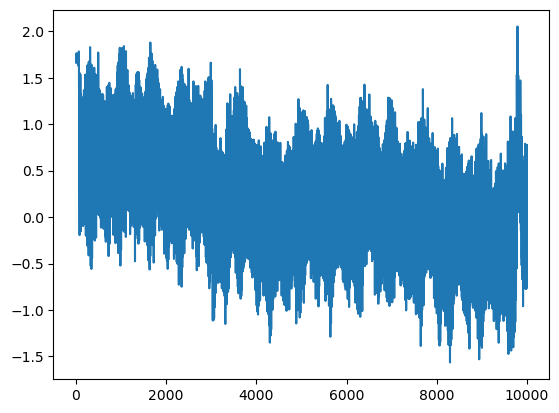

(<Figure size 640x480 with 1 Axes>,
 None)

In [28]:
plt.figure(), plt.plot(mean_zs[0:10000]), plt.show()

In [28]:
np.where(mean_zs>-1.5)[0]


array([    71,     72,     73, ..., 109857, 109858, 109859])

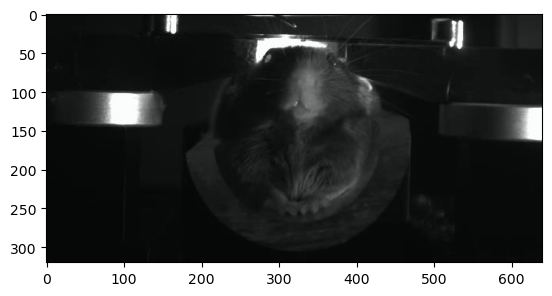

(<Figure size 640x480 with 1 Axes>,
 None)

In [42]:

plt.figure(), plt.imshow(beh_stack[109880,:,:,:]), plt.show()

###### plt.figure(), plt.plot(mean_zs[66-2:66+3]), plt.show()

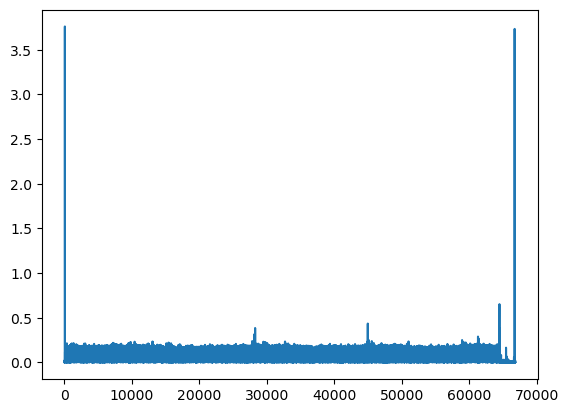

(<Figure size 640x480 with 1 Axes>,
 None)

In [41]:
test = np.abs(np.gradient(mean_zs))
plt.figure(), plt.plot(test), plt.show()

In [42]:
np.where(test>0.6)

(array([   69,    70, 64458, 66707, 66708]),)

In [17]:
data_list_file = '/home/user/Documents/grooming/expt3_datalist.txt'
test = get_data_list(data_list_file)

In [18]:
test

['Y:\\pankaj\\closedloop_rig5_data\\GER2_ai94_drinking\\2023122812254',
 'Y:\\pankaj\\closedloop_rig5_data\\GER2_ai94_drinking\\2023122913050',
 'Y:\\pankaj\\closedloop_rig5_data\\GER2_ai94_drinking\\2023123012533',
 'Y:\\pankaj\\closedloop_rig5_data\\GER2_ai94_drinking\\2023123113502',
 'Y:\\pankaj\\closedloop_rig5_data\\GER2_ai94_drinking\\2024010109431',
 'Y:\\pankaj\\closedloop_rig5_data\\GER2_ai94_drinking\\2024010312073',
 'Y:\\pankaj\\closedloop_rig5_data\\GER2_ai94_drinking\\2024010412201',
 'Y:\\pankaj\\closedloop_rig5_data\\GER2_ai94_drinking\\2024010512181',
 'Y:\\pankaj\\closedloop_rig5_data\\GER2_ai94_drinking\\2024010612055',
 'Y:\\pankaj\\closedloop_rig5_data\\GER2_ai94_drinking\\2024010811492',
 'Y:\\pankaj\\closedloop_rig5_data\\GER2_ai94_drinking\\2024010911294',
 'Y:\\pankaj\\closedloop_rig5_data\\GIL2_ai94_drinking\\2023121609090',
 'Y:\\pankaj\\closedloop_rig5_data\\GIL2_ai94_drinking\\2023121709223',
 'Y:\\pankaj\\closedloop_rig5_data\\GIL2_ai94_drinking\\20231218